<a href="https://colab.research.google.com/github/Danalmestadi/T5-Week-seven/blob/main/auto_correction_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto-Correction Exercise

This exercise will guide you through building an auto-correct system in Python. Follow the instructions in each step to complete the implementation.

## Step 1: Import Libraries

Import the necessary libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

## Step 2: Load Data

Load a trusted text corpus to build the auto-correct system.

In [2]:

# Load the corpus
with open('challenge.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

# A small sample of the corpus
file[0][:3000]


"Data science is one of the hottest jobs of this century. There are so many career opportunities for you today if you know how to work with data. But Data Scientists often face many challenges if they're not in big tech companies like FAANG. So in this article, I'm going to introduce you to some of the major challenges you may face in a data science job.\n"

## Step 3: Data Processing

Tokenize the text and convert all characters to lowercase to clean the data.

In [3]:

def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words

word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")


The first ten words in the text are: 
['data', 'science', 'is', 'one', 'of', 'the', 'hottest', 'jobs', 'of', 'this']
There are 215 unique words in the vocabulary.



## Step 4: Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Check if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggest candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculate the probability of each candidate word.
4. **Replace Mispells**: Replace the misspelled word with the most probable suggestion.

Implement each part step-by-step in the cells below.


### Step 4.1: Filtering Mispells

Write a function to identify words not present in the vocabulary.

In [4]:

def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('Data science is one of the hottest jobs of this century.', vocab)


['century.']

### Step 4.2: Word Suggestion Mechanism

Implement functions to suggest words by deleting, switching, replacing, or inserting characters.

In [5]:
# Delete letter

def delete_letter(word, verbose=False):
    delete_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="cans", verbose=True)


input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [8]:
# Switch letter

def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="data", verbose=True)


Input word = data 
split_l = [('', 'data'), ('d', 'ata'), ('da', 'ta'), ('dat', 'a')] 
switch_l = ['adta', 'dtaa', 'daat']


In [9]:
# Replace letter

def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='job', verbose=True)


Input word = job 
split_l = [('', 'job'), ('j', 'ob'), ('jo', 'b')] 
replace_l = ['aob', 'bob', 'cob', 'dob', 'eob', 'fob', 'gob', 'hob', 'iob', 'jab', 'jbb', 'jcb', 'jdb', 'jeb', 'jfb', 'jgb', 'jhb', 'jib', 'jjb', 'jkb', 'jlb', 'jmb', 'jnb', 'joa', 'joc', 'jod', 'joe', 'jof', 'jog', 'joh', 'joi', 'joj', 'jok', 'jol', 'jom', 'jon', 'joo', 'jop', 'joq', 'jor', 'jos', 'jot', 'jou', 'jov', 'jow', 'jox', 'joy', 'joz', 'jpb', 'jqb', 'jrb', 'jsb', 'jtb', 'jub', 'jvb', 'jwb', 'jxb', 'jyb', 'jzb', 'kob', 'lob', 'mob', 'nob', 'oob', 'pob', 'qob', 'rob', 'sob', 'tob', 'uob', 'vob', 'wob', 'xob', 'yob', 'zob']


In [10]:
# Insert letter

def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('is', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")


Input word is 
split_l = [('', 'is'), ('i', 's'), ('is', '')] 
insert_l = ['ais', 'bis', 'cis', 'dis', 'eis', 'fis', 'gis', 'his', 'iis', 'jis', 'kis', 'lis', 'mis', 'nis', 'ois', 'pis', 'qis', 'ris', 'sis', 'tis', 'uis', 'vis', 'wis', 'xis', 'yis', 'zis', 'ias', 'ibs', 'ics', 'ids', 'ies', 'ifs', 'igs', 'ihs', 'iis', 'ijs', 'iks', 'ils', 'ims', 'ins', 'ios', 'ips', 'iqs', 'irs', 'iss', 'its', 'ius', 'ivs', 'iws', 'ixs', 'iys', 'izs', 'isa', 'isb', 'isc', 'isd', 'ise', 'isf', 'isg', 'ish', 'isi', 'isj', 'isk', 'isl', 'ism', 'isn', 'iso', 'isp', 'isq', 'isr', 'iss', 'ist', 'isu', 'isv', 'isw', 'isx', 'isy', 'isz']
Number of strings output by insert_letter('at') is 78


**Combining Functions for Word Suggestions**

Combine the functions to edit one or two characters in a word.

In [11]:
# Edit one letter

def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set




In [12]:
tmp_word = "job"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : job 
edit_one_l 
['ajob', 'aob', 'bjob', 'bob', 'cjob', 'cob', 'djob', 'dob', 'ejob', 'eob', 'fjob', 'fob', 'gjob', 'gob', 'hjob', 'hob', 'ijob', 'iob', 'jab', 'jaob', 'jb', 'jbb', 'jbo', 'jbob', 'jcb', 'jcob', 'jdb', 'jdob', 'jeb', 'jeob', 'jfb', 'jfob', 'jgb', 'jgob', 'jhb', 'jhob', 'jib', 'jiob', 'jjb', 'jjob', 'jkb', 'jkob', 'jlb', 'jlob', 'jmb', 'jmob', 'jnb', 'jnob', 'jo', 'joa', 'joab', 'joba', 'jobb', 'jobc', 'jobd', 'jobe', 'jobf', 'jobg', 'jobh', 'jobi', 'jobj', 'jobk', 'jobl', 'jobm', 'jobn', 'jobo', 'jobp', 'jobq', 'jobr', 'jobs', 'jobt', 'jobu', 'jobv', 'jobw', 'jobx', 'joby', 'jobz', 'joc', 'jocb', 'jod', 'jodb', 'joe', 'joeb', 'jof', 'jofb', 'jog', 'jogb', 'joh', 'johb', 'joi', 'joib', 'joj', 'jojb', 'jok', 'jokb', 'jol', 'jolb', 'jom', 'jomb', 'jon', 'jonb', 'joo', 'joob', 'jop', 'jopb', 'joq', 'joqb', 'jor', 'jorb', 'jos', 'josb', 'jot', 'jotb', 'jou', 'joub', 'jov', 'jovb', 'jow', 'jowb', 'jox', 'joxb', 'joy', 'joyb', 'joz', 'jozb', 'jpb', 'jpob', 'jqb', 

In [13]:
# Edit two letters
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

In [15]:
tmp_edit_two_set = edit_two_letters("d")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('data'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aad', 'ab', 'abd', 'ac', 'acd', 'ad', 'ada']
Last 10 strings ['zv', 'zvd', 'zw', 'zwd', 'zx', 'zxd', 'zy', 'zyd', 'zz', 'zzd']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 24201


### Step 4.3: Probability Distribution

Calculate the frequency of each word in the corpus and compute the probability distribution.

In [18]:

def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'is' is {word_count_dict.get('is',0)}")


There are 215 key values pairs
The count for the word 'is' is 15


In [19]:

def get_probs(word_count_dict):
    probs = {}
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('you') is {probs['you']:.4f}")


Length of probs is 215
P('you') is 0.0390


<Axes: xlabel='word'>

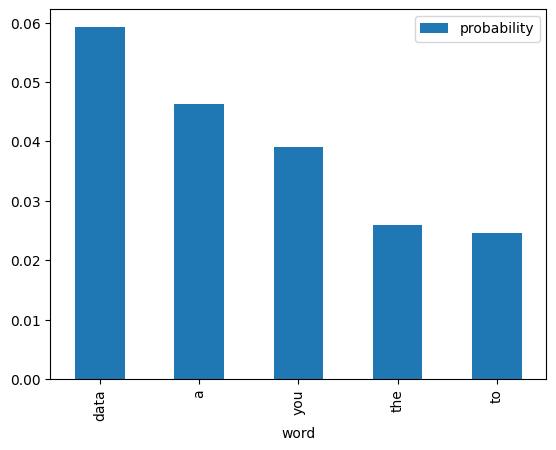

In [20]:

# Display probability distribution
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')


### Step 4.4: Replace Misspells with Correction

Write a function to replace misspelled words with the most probable corrections.

In [21]:
# Your code here to replace misspells

def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = []
    n_best = []

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

get_correct_word('annd', vocab, probs, 100)


'and'

### Step 5: Final Auto-Correction Function

Combine all parts into a final function that corrects sentences.

In [22]:
# Your code here for the final auto-correction function

def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())



### Step 6: Demo

Apply your work to a sentence

In [23]:
autocorrect("Thee are so mannny career opportunitiessw for you today if you know how to work with data", vocab, probs)


Input sentence :  Thee are so mannny career opportunitiessw for you today if you know how to work with data
Wrong words :  ['thee', 'mannny', 'opportunitiessw']
Output Sentence :  The are so many career opportunities for you today if you know how to work with data
